In [1]:
import numpy as np
import cv2
import os
from  matplotlib import pyplot as plt
%matplotlib inline


folder = '/Users/davidchoqueluqueroman/Desktop/PROJECTS-SOURCE-CODES/violencedetection2/DATASETS'
im1=cv2.imread(os.path.join(folder,'RWF-2000/frames/train/Fight/_2RYnSFPD_U_0/frame1.jpg'))
im2=cv2.imread(os.path.join(folder,'RWF-2000/frames/train/Fight/_2RYnSFPD_U_0/frame2.jpg'))
# cv2.imshow('im1',im1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

print(im1.shape, im2.shape)



(224, 224, 3) (224, 224, 3)


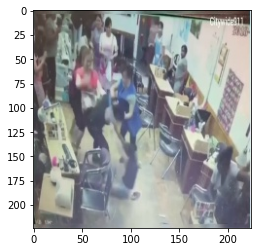

In [2]:
plt.imshow(im1[:,:,::-1])
plt.show()

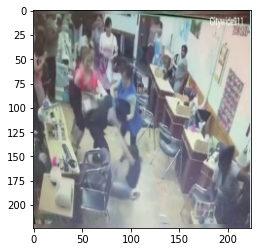

In [3]:
plt.imshow(im2[:,:,::-1])
plt.show()

In [4]:
hsv = np.zeros_like(im1)
hsv[...,1] = 255

im1 = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY)
im2 = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)

In [5]:
hsv.shape

(224, 224, 3)

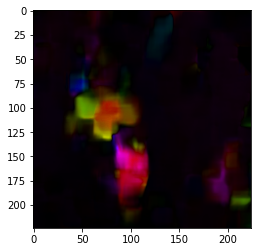

In [6]:
flow = cv2.calcOpticalFlowFarneback(im1,im2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
plt.imshow(bgr[:,:,::-1])
plt.show()

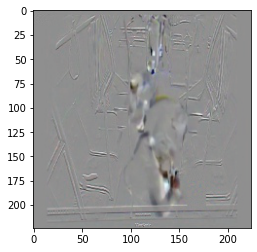

In [10]:
path='/Users/davidchoqueluqueroman/Desktop/PROJECTS-SOURCE-CODES/violencedetection2/IMAGES'
dyn_img = cv2.imread(os.path.join(path,'rwf-2000-3OKArbzg1uc_3-1.png'))
plt.imshow(dyn_img[:,:,::-1])
plt.show()

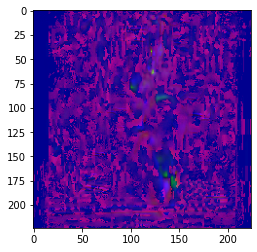

In [11]:
dyn_img = cv2.cvtColor(dyn_img, cv2.COLOR_BGR2RGB)


In [15]:
!pip3 install ipyvolume

     |████████████████████████████████| 2.9 MB 542 kB/s eta 0:00:01
     |████████████████████████████████| 121 kB 692 kB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 658 kB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 259 kB 697 kB/s eta 0:00:01


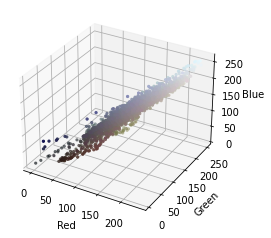

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(dyn_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

pixel_colors = dyn_img.reshape((np.shape(dyn_img)[0]*np.shape(dyn_img)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

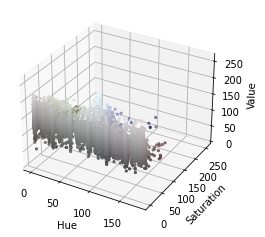

In [14]:
hsv_img = cv2.cvtColor(dyn_img, cv2.COLOR_RGB2HSV)
# plt.imshow(hsv_img)
# plt.show()
h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [18]:
!(cd js; npm run watch)

/bin/bash: line 0: cd: js: No such file or directory
npm ERR! code ENOENT
npm ERR! syscall open
npm ERR! path /Users/davidchoqueluqueroman/Desktop/PROJECTS-SOURCE-CODES/violencedetection2/Notebooks/package.json
npm ERR! errno -2
npm ERR! enoent ENOENT: no such file or directory, open '/Users/davidchoqueluqueroman/Desktop/PROJECTS-SOURCE-CODES/violencedetection2/Notebooks/package.json'
npm ERR! enoent This is related to npm not being able to find a file.
npm ERR! enoent 

npm ERR! A complete log of this run can be found in:
npm ERR!     /Users/davidchoqueluqueroman/.npm/_logs/2020-12-22T06_17_32_487Z-debug.log


In [16]:
import ipyvolume as ipv
import numpy as np
N = 1000
x, y, z = np.random.normal(0, 1, (3, N))
fig = ipv.figure()
scatter = ipv.scatter(x, y, z)
ipv.show()

In [1]:
import os
import sys
sys.path.append('/Users/davidchoqueluqueroman/Documents/CODIGOS/violencedetection2')
# print(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))

In [2]:

from MODELS.AGCNN import Densenet121_AG, Fusion_Branch, DenseNet121, Resnet50
# import importlib


In [3]:
densenet = DenseNet121(2,False)

In [4]:
print(densenet)

DenseNet121(
  (convs): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, a

In [5]:

resnet = Resnet50(2, False)

In [6]:
print(resnet)

Resnet50(
  (resnet50): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64